In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('Data\marketing_sample_for_makemytrip_com-travel__20190901_20190930__30k_data.csv',on_bad_lines='skip')
# Display the first few rows of the dataset
df.head()

,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,...,Airline,Flight Stops,Onwards Return Flight Time,Meals,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Initial Payment For Booking,Cancellation Rules,Date Change Rules
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-19 23:07:23 +0000,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,...,IndiGo,NaN,14 : 00-16 : 05,NaN,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,NaN,Cancellation any time after making the 1st pay...,NaN
1,c782c902e6d370153361d708bb2bca64,2019-09-25 16:15:44 +0000,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,02-10-2019,...,Spicejet|IndiGo,NaN,15 : 45-17 : 45|10 : 50-13 : 00,NaN,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,NaN,Cancellation any time after making the 1st pay...,NaN
2,1087ed9303d0ac724460088a5920065d,2019-09-26 04:18:42 +0000,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Manali,3N Manali,Manali,24-10-2019,...,NaN,NaN,NaN,NaN,12045,6022.5,Vashishth Kund | Hadimba Temple | Tibetan Mon...,NaN,This cancellation policy is applicable for boo...,NaN
3,3bda4788836d573910f605154ba949dc,2019-09-24 11:46:20 +0000,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,26-10-2019,...,IndiGo|IndiGo,NaN,06 : 30-09 : 10|12 : 45-14 : 20,NaN,31933,15966.5,Gondola Point | Avantipura Ruins | Mughal Gar...,NaN,Cancellation any time after making the 1st pay...,NaN
4,aab612682c998bde97e040b212cd5689,2019-09-25 12:45:50 +0000,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,13-10-2019,...,NaN,NaN,NaN,NaN,35725,17862.5,Pinjore Gardens | Mall road | Kufri | Indira ...,NaN,Cancellation any time after making the 1st pay...,NaN


In [3]:
df.describe()

,Flight Stops,Meals,Price Per Two Persons,Per Person Price,Initial Payment For Booking,Date Change Rules
count,0.0,0.0,27454.000000,27454.000000,0.0,0.0
mean,NaN,NaN,39517.943688,19758.971844,NaN,NaN
std,NaN,NaN,23067.431040,11533.715520,NaN,NaN
min,NaN,NaN,1582.000000,791.000000,NaN,NaN
25%,NaN,NaN,24549.500000,12274.750000,NaN,NaN
50%,NaN,NaN,34921.500000,17460.750000,NaN,NaN
75%,NaN,NaN,49342.750000,24671.375000,NaN,NaN
max,NaN,NaN,342125.000000,171062.500000,NaN,NaN


In [4]:
df.isnull().sum()

Uniq Id                            0
Crawl Timestamp                    0
Package Name                       0
Page Url                           0
Package Type                       0
Company                            0
Destination                        0
Itinerary                          0
Places Covered                     0
Travel Date                        0
Hotel Details                   4167
Start City                         0
Airline                         6153
Flight Stops                   27454
Onwards Return Flight Time      6153
Meals                          27454
Price Per Two Persons              0
Per Person Price                   0
Sightseeing Places Covered      2127
Initial Payment For Booking    27454
Cancellation Rules              1138
Date Change Rules              27454
dtype: int64

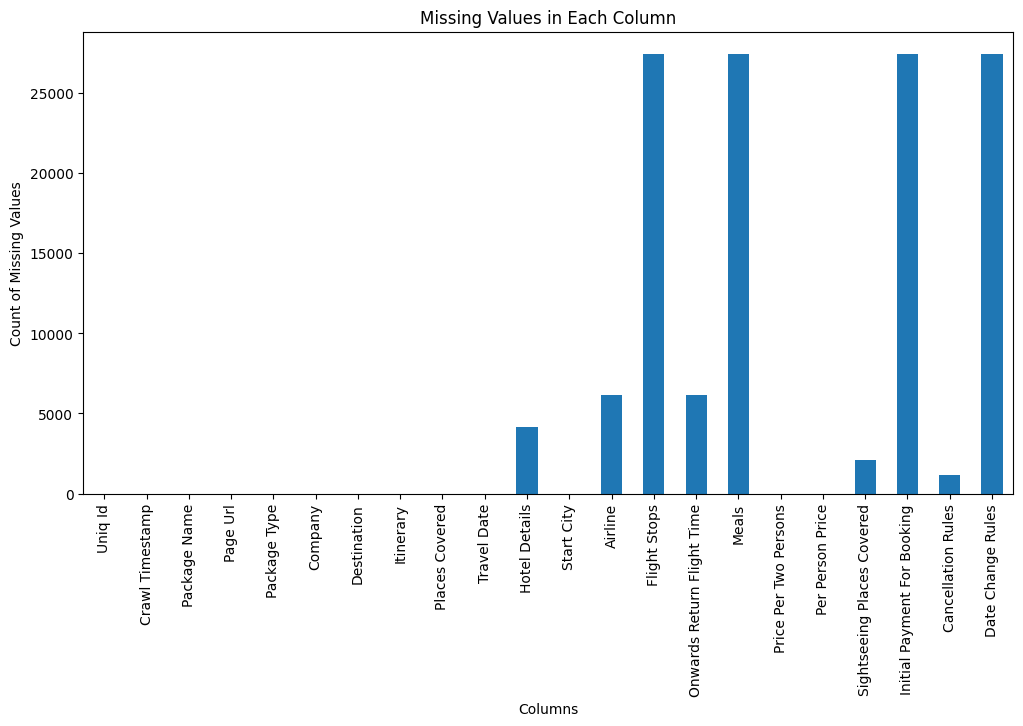

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [6]:
df.shape

(27454, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27454 entries, 0 to 27453
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      27454 non-null  object 
 1   Crawl Timestamp              27454 non-null  object 
 2   Package Name                 27454 non-null  object 
 3   Page Url                     27454 non-null  object 
 4   Package Type                 27454 non-null  object 
 5   Company                      27454 non-null  object 
 6   Destination                  27454 non-null  object 
 7   Itinerary                    27454 non-null  object 
 8   Places Covered               27454 non-null  object 
 9   Travel Date                  27454 non-null  object 
 10  Hotel Details                23287 non-null  object 
 11  Start City                   27454 non-null  object 
 12  Airline                      21301 non-null  object 
 13  Flight Stops    


1. **Relevant Features**:
   - **Package Type**: Potentially useful for analysis.
   - **Travel Date**: Valuable as a numerical variable.
   - **Price Per Two Persons**: Highly relevant, being a numerical target variable.
   - **Start City**: Valuable due to its binary nature.
   
2. **Not Useful Features**:
   - **Uniq Id**: Not useful for pattern discovery.
   - **Crawl Timestamp**: Irrelevant, representing scraping time.
   - **Page Url**: Doesn't contribute to analysis.
   - **Company**: Not suitable for the task.
   - **Destination**: Contains only text data, not useful for regression.
   - **Itinerary**: Similarly, contains textual data.
   - **Places Covered**: Textual data.
   - **Hotel Details**: More text data.
   - **Airline**: Textual information.
   - **Onwards Return Flight Time**: Limited usefulness.
   - **Sightseeing Places Covered**: Textual data.

3. **Unused Columns**:
   - **Flight Stops**, **Meals**, **Initial Payment For Booking**, **Date Change Rules**: These columns have no data or minimal relevance for regression.



In [8]:
# Filling missing values for Hotel Details with 'Not Available'
df['Hotel Details'].fillna('Not Available', inplace=True)

# Filling missing values for Airline with 'Not Available'
df['Airline'].fillna('Not Available', inplace=True)

# Filling missing values for Onwards Return Flight Time with 'Not Available'
df['Onwards Return Flight Time'].fillna('Not Available', inplace=True)

# Filling missing values for Sightseeing Places Covered with 'Not Available'
df['Sightseeing Places Covered'].fillna('Not Available', inplace=True)

# Filling missing values for Initial Payment For Booking with 0 (assuming no initial payment)
df['Initial Payment For Booking'].fillna(0, inplace=True)

# Filling missing values for Cancellation Rules with 'Not Available'
df['Cancellation Rules'].fillna('Not Available', inplace=True)

# Dropping columns with all missing values (Flight Stops, Date Change Rules, Unnamed: 22, Unnamed: 23)
df.drop(columns=["Flight Stops", "Meals", "Initial Payment For Booking", "Date Change Rules"], inplace=True)

# Print the first few rows to check the changes
df.head()


,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Onwards Return Flight Time,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Cancellation Rules
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-19 23:07:23 +0000,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...
1,c782c902e6d370153361d708bb2bca64,2019-09-25 16:15:44 +0000,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,02-10-2019,"Quality Airport Hotel:4.1|Hotel Hillview, Munn...",Mumbai,Spicejet|IndiGo,15 : 45-17 : 45|10 : 50-13 : 00,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,Cancellation any time after making the 1st pay...
2,1087ed9303d0ac724460088a5920065d,2019-09-26 04:18:42 +0000,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Manali,3N Manali,Manali,24-10-2019,Not Available,Mumbai,Not Available,Not Available,12045,6022.5,Vashishth Kund | Hadimba Temple | Tibetan Mon...,This cancellation policy is applicable for boo...
3,3bda4788836d573910f605154ba949dc,2019-09-24 11:46:20 +0000,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,26-10-2019,Alpine Ridge:3.4|Hotel Hilltop:3.6|The Pride I...,New Delhi,IndiGo|IndiGo,06 : 30-09 : 10|12 : 45-14 : 20,31933,15966.5,Gondola Point | Avantipura Ruins | Mughal Gar...,Cancellation any time after making the 1st pay...
4,aab612682c998bde97e040b212cd5689,2019-09-25 12:45:50 +0000,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,13-10-2019,Not Available,Mumbai,Not Available,Not Available,35725,17862.5,Pinjore Gardens | Mall road | Kufri | Indira ...,Cancellation any time after making the 1st pay...


In [9]:
df.nunique()

Uniq Id                       27454
Crawl Timestamp               25974
Package Name                   2231
Page Url                      26628
Package Type                   1092
Company                           6
Destination                     566
Itinerary                      1190
Places Covered                  895
Travel Date                     279
Hotel Details                  6500
Start City                        2
Airline                         342
Onwards Return Flight Time     2111
Price Per Two Persons         21313
Per Person Price              21313
Sightseeing Places Covered     1772
Cancellation Rules                9
dtype: int64

In [10]:
df['Travel Date'] = pd.to_datetime(df['Travel Date'], format='%d-%m-%Y', errors='coerce')

In [11]:
allowed_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget'] #Data Filteration

# Filter the DataFrame to keep only the rows with allowed package types
df = df[df['Package Type'].isin(allowed_package_types)]

In [12]:
df.drop('Company', axis=1, inplace=True)

In [13]:
df.drop('Crawl Timestamp', axis=1, inplace=True)

In [14]:
# Check for missing values
df.isnull().sum()

Uniq Id                       0
Package Name                  0
Page Url                      0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Onwards Return Flight Time    0
Price Per Two Persons         0
Per Person Price              0
Sightseeing Places Covered    0
Cancellation Rules            0
dtype: int64

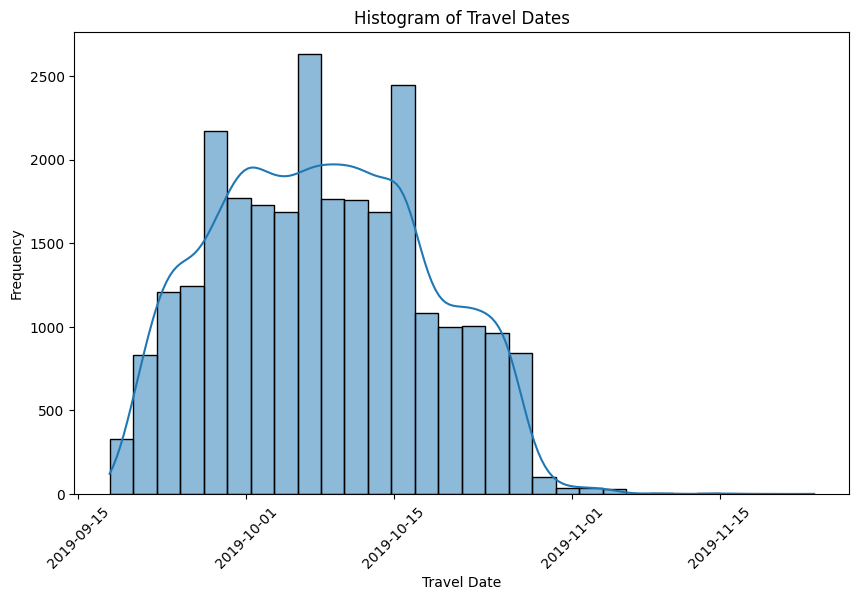

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Travel Date'], bins=30, kde=True)
plt.title('Histogram of Travel Dates')
plt.xlabel('Travel Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

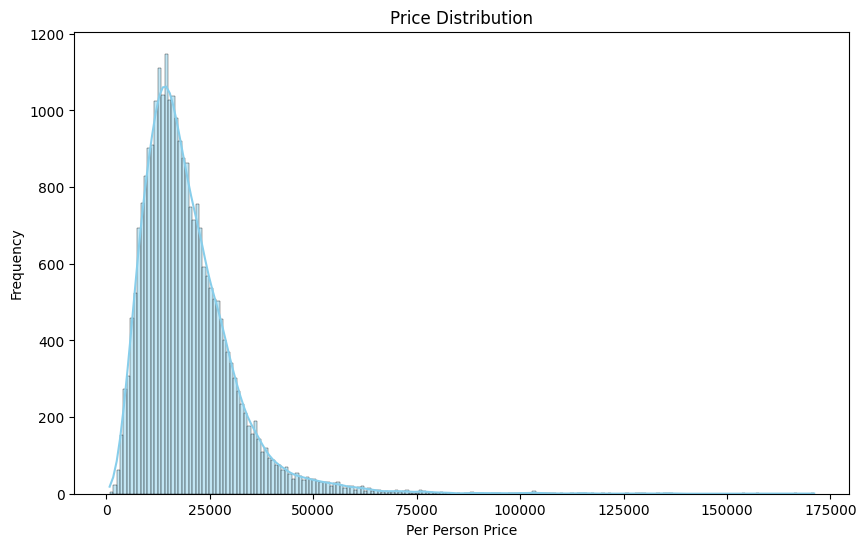

In [16]:
# Price Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Per Person Price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Per Person Price')
plt.ylabel('Frequency')
plt.show()

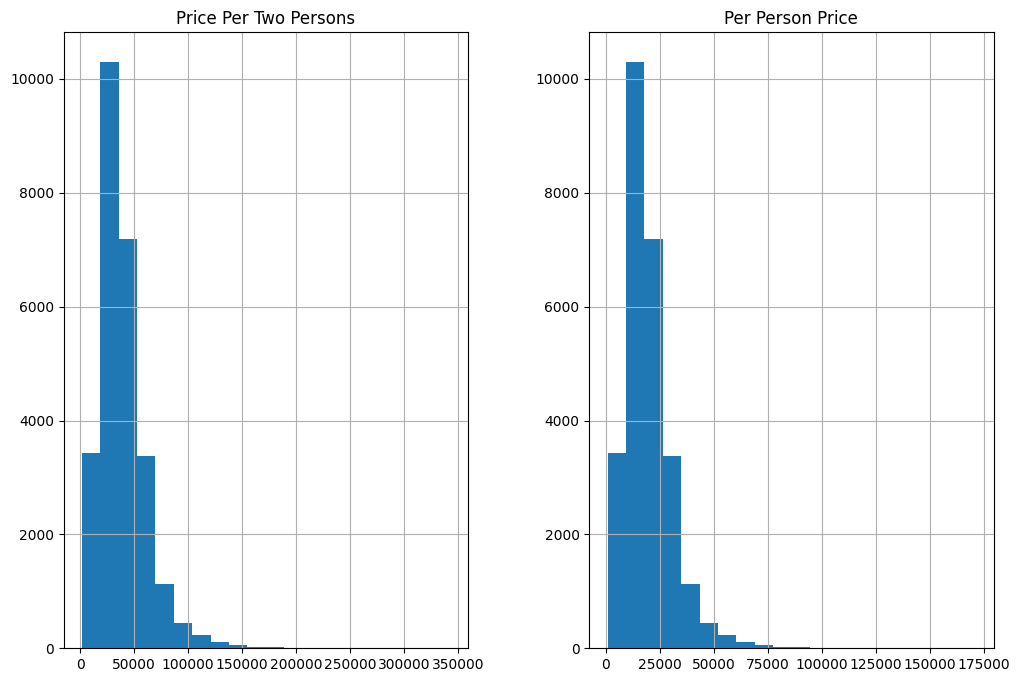

In [17]:
# Plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

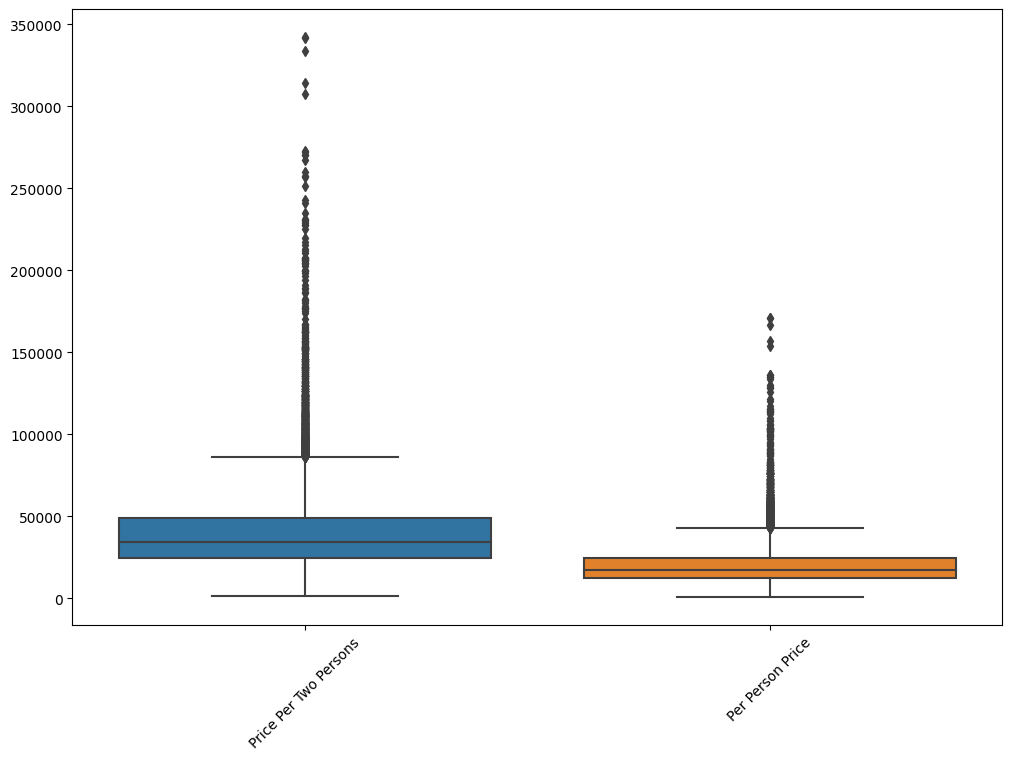

In [18]:
# Plot box plots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

In [19]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

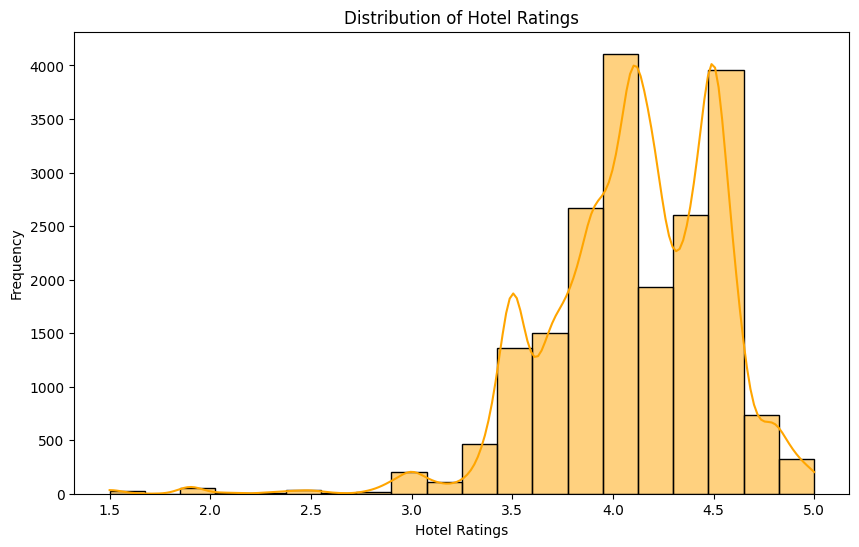

In [20]:
# Hotel Ratings Distribution

hotel_ratings = df['Hotel Details'].str.extract(r'(\d+\.\d+)')
hotel_ratings = pd.to_numeric(hotel_ratings[0], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(hotel_ratings, bins=20, kde=True, color='orange')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Frequency')
plt.show()

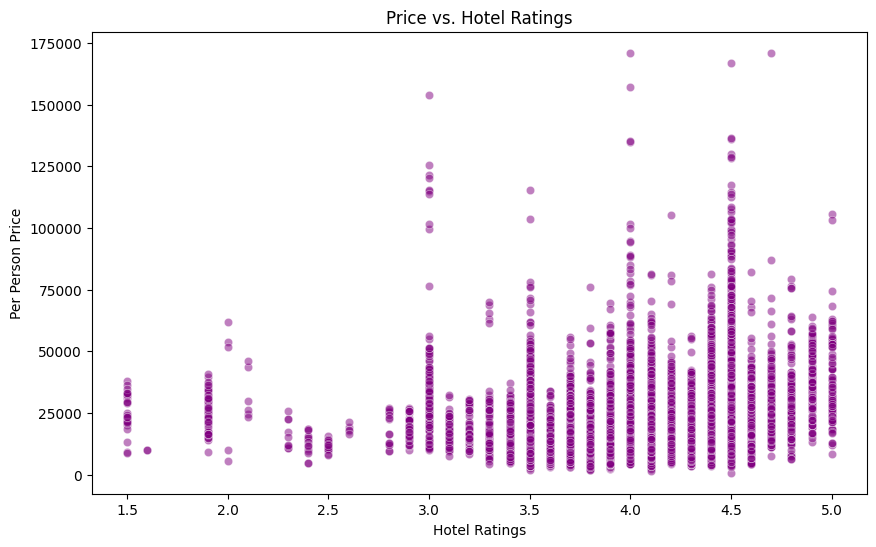

In [21]:
# Price vs. Hotel Ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=hotel_ratings, y='Per Person Price', color='purple', alpha=0.5)
plt.title('Price vs. Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Per Person Price')
plt.show()


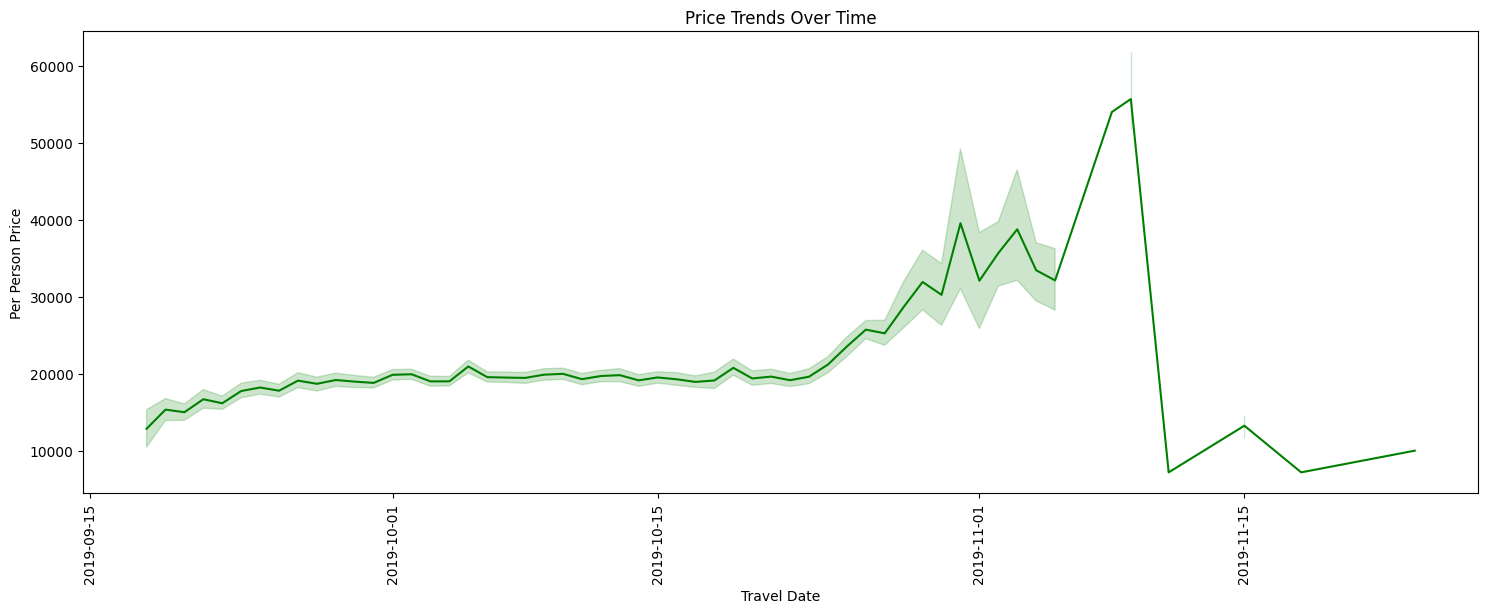

In [22]:
# Price vs. Travel Date

plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Travel Date', y='Per Person Price', color='green')
plt.title('Price Trends Over Time')
plt.xlabel('Travel Date')
plt.ylabel('Per Person Price')
plt.xticks(rotation=90)
plt.show()


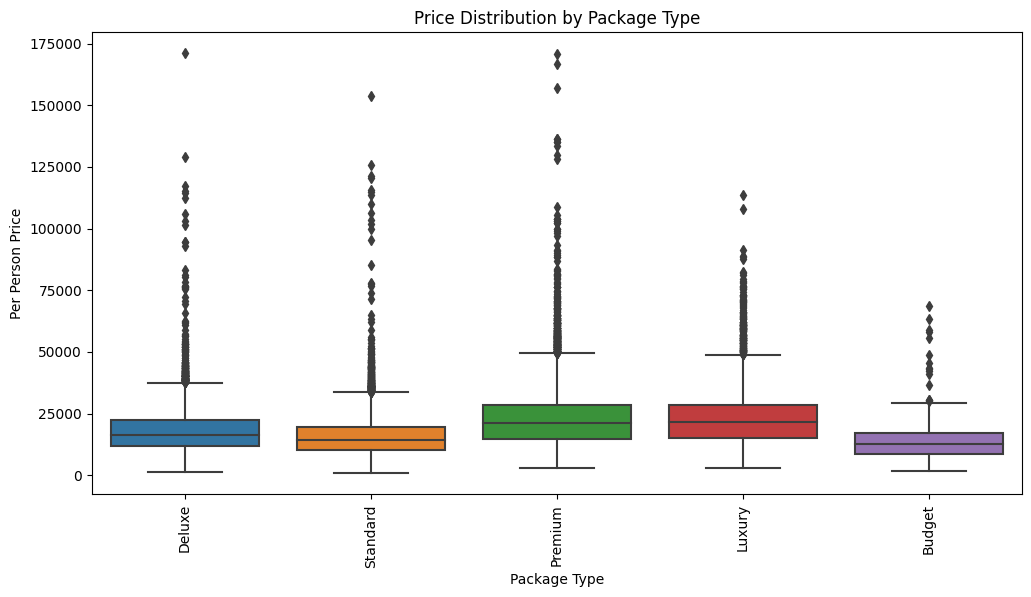

In [23]:
# Box Plots:
# Visualize the distribution of prices per package type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Package Type', y='Per Person Price')
plt.xticks(rotation=90)
plt.xlabel('Package Type')
plt.ylabel('Per Person Price')
plt.title('Price Distribution by Package Type')
plt.show()

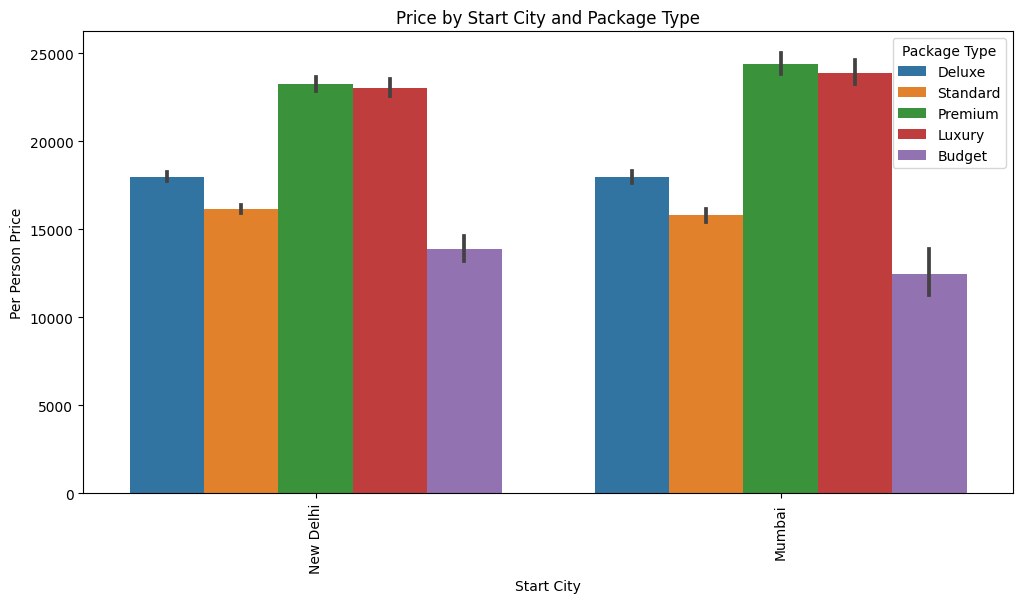

In [24]:
# Bar Plots:
# Explore the relationship between the start city and package types:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Start City', y='Per Person Price', hue='Package Type')
plt.xticks(rotation=90)
plt.xlabel('Start City')
plt.ylabel('Per Person Price')
plt.title('Price by Start City and Package Type')
plt.show()

In [25]:
# # Uncomment this code if You want Word Clouds of the words:
# # If you want to visualize common words in text columns like "Destination," you can create a word cloud:

# from wordcloud import WordCloud

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Destination']))
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud - Destination')
# plt.show()

Deluxe      7442
Standard    7196
Premium     7025
Luxury      4065
Budget       639
Name: Package Type, dtype: int64


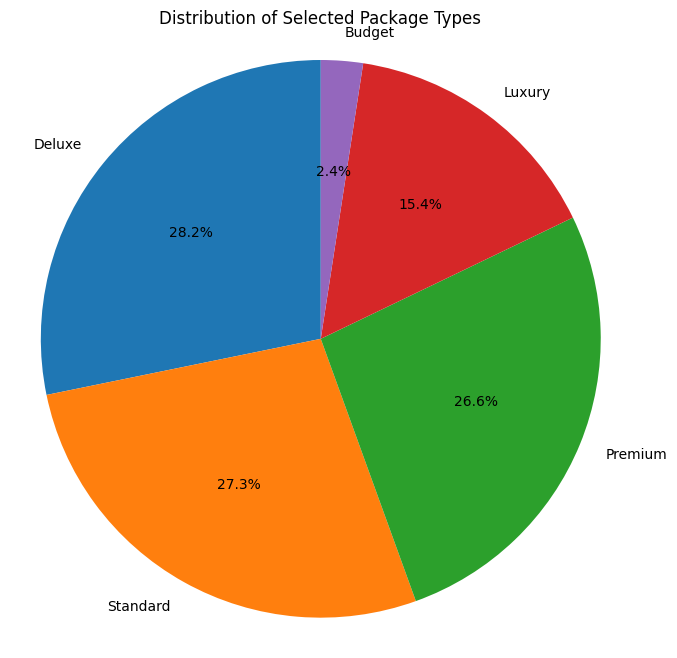

In [26]:
selected_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget']
filtered_df = df[df['Package Type'].isin(selected_package_types)]

# Get the counts of each package type
package_type_counts = filtered_df['Package Type'].value_counts()

# Display the counts of each class in 'Package Type'
print(package_type_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(package_type_counts, labels=package_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Selected Package Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

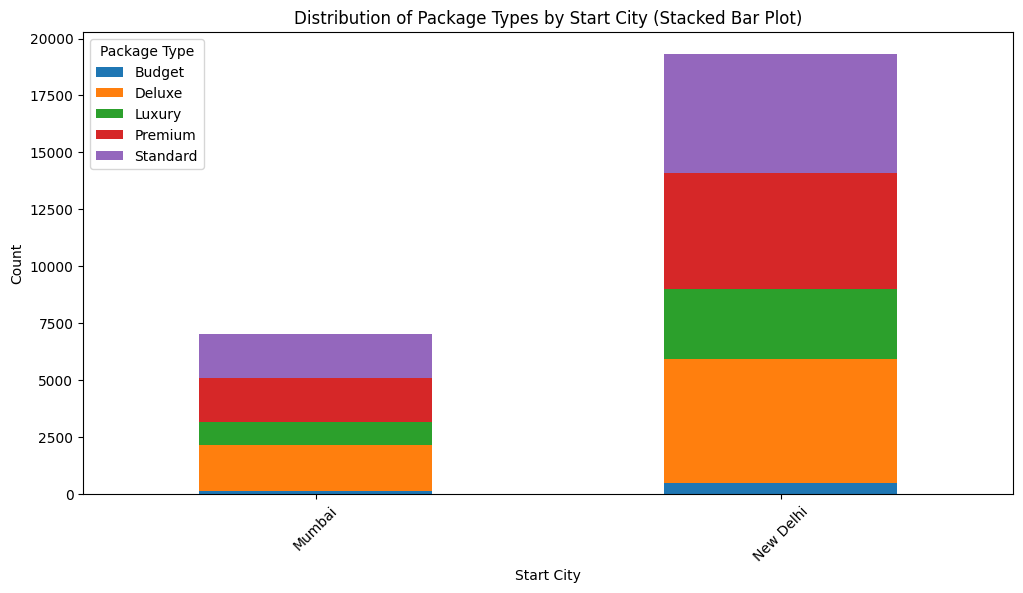

In [27]:
# Stacked Bar Plot:
# Show the distribution of package types by start city using a stacked bar plot:

city_package_counts = df.groupby(['Start City', 'Package Type']).size().unstack(fill_value=0)
city_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Start City')
plt.ylabel('Count')
plt.title('Distribution of Package Types by Start City (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [29]:
# Extracting hotel ratings from Hotel Details
df['Hotel Ratings'] = df['Hotel Details'].str.extract(r'(\d+\.\d+)')

# Convert 'Hotel Ratings' to numeric (float)
df['Hotel Ratings'] = pd.to_numeric(df['Hotel Ratings'], errors='coerce')

In [30]:
df['Hotel Ratings'].isnull().sum()

6236

In [31]:
# Calculate the mode of the 'Hotel Ratings' column
mode_rating = df['Hotel Ratings'].mode()[0]

# Replace NaN values with the mode
df['Hotel Ratings'].fillna(mode_rating, inplace=True)
df['Hotel Ratings'].isnull().sum()

0

In [32]:
# Assuming your data is stored in a DataFrame called 'df'
df['Travel Date'] = pd.to_datetime(df['Travel Date'])
df['Travel_Year'] = df['Travel Date'].dt.year
df['Travel_Month'] = df['Travel Date'].dt.month
df['Travel_DayOfWeek'] = df['Travel Date'].dt.dayofweek

In [33]:
# Example of one-hot encoding
df = pd.get_dummies(df, columns=['Package Type','Start City'])

In [34]:
Q1 = df['Per Person Price'].quantile(0.25)
Q3 = df['Per Person Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
df = df[(df['Per Person Price'] >= lower_bound) & (df['Per Person Price'] <= upper_bound)]


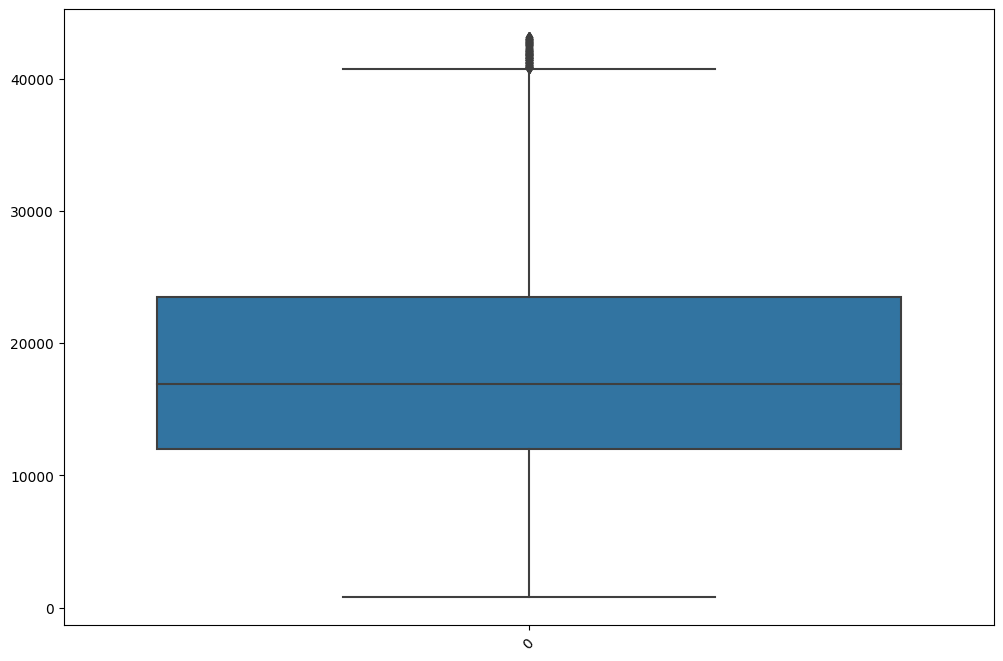

In [35]:
#Visualization after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['Per Person Price'])
plt.xticks(rotation=45)
plt.show()

In [36]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Airline',
       'Onwards Return Flight Time', 'Price Per Two Persons',
       'Per Person Price', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Hotel Ratings', 'Travel_Year', 'Travel_Month', 'Travel_DayOfWeek',
       'Package Type_Budget', 'Package Type_Deluxe', 'Package Type_Luxury',
       'Package Type_Premium', 'Package Type_Standard', 'Start City_Mumbai',
       'Start City_New Delhi'],
      dtype='object')

In [37]:
correlation_matrix = df.corr()
k = 15  # Replace with the desired number of top features
selected_features = correlation_matrix['Per Person Price'].abs().sort_values(ascending=False).index[2:k+1]


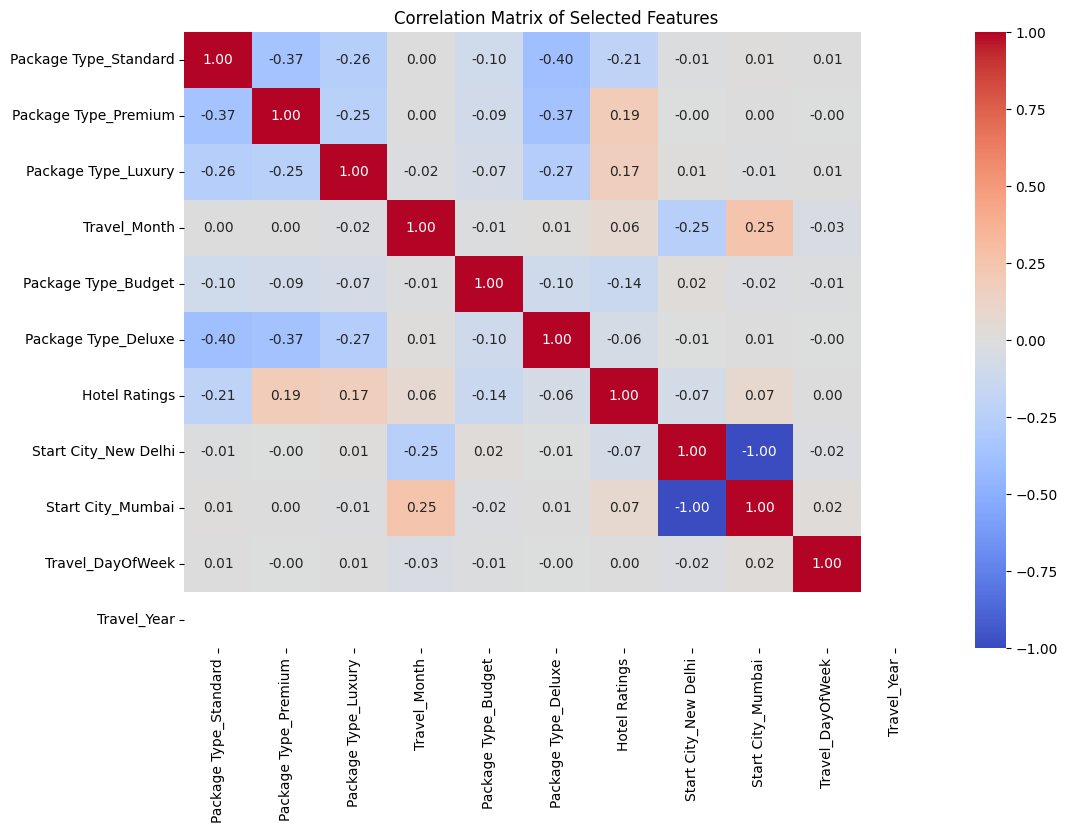

In [38]:
# Create a subset of the DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = subset_df.corr()

# Set up the plot figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Matrix of Selected Features')

# Show the plot
plt.show()

In [39]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [40]:
# Encode text-based columns and create embeddings
text_columns = ['Package Name', 'Destination', 'Itinerary', 'Places Covered', 'Hotel Details', 'Airline', 'Sightseeing Places Covered', 'Cancellation Rules']

for column in text_columns:
    df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = df[text_columns].values.tolist()

In [41]:
df.to_csv('Data\processed_data.csv', index=False)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

#  Apply PCA separately to each text embedding column
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(df), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = df[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

# Combine text embeddings with other numerical features if available
numerical_features = [
    'Package Type_Standard', 'Package Type_Premium', 'Package Type_Luxury',
    'Travel_Month', 'Package Type_Budget', 'Package Type_Deluxe',
    'Hotel Ratings', 'Start City_New Delhi', 'Start City_Mumbai',
    'Travel_DayOfWeek', 'Travel_Year'
]

#saving the pca analysis
import joblib
joblib.dump(pca, 'pca.joblib')

['pca.joblib']

In [44]:
X_numerical = df[numerical_features].values

# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = df['Per Person Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#saving the pca model
import joblib
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

Mean Absolute Error (MAE): 3175.011812267233
Mean Squared Error (MSE): 18504320.37072275
Root Mean Squared Error (RMSE): 4301.664837097696
R-squared (R2): 0.738132900483755


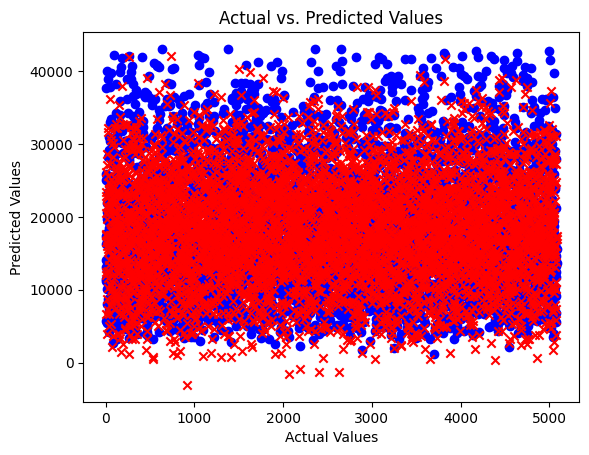

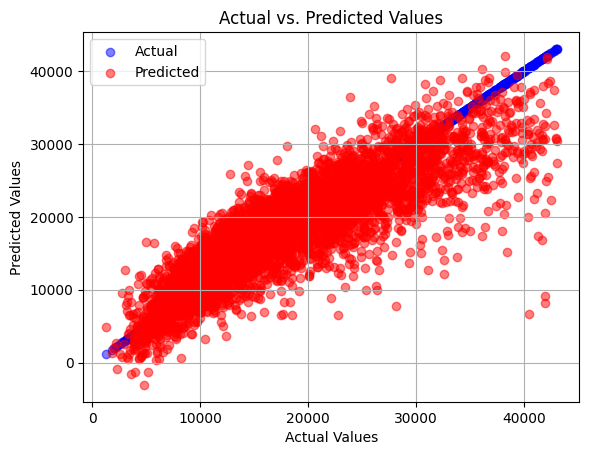

In [45]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [47]:
#Saving the LR model
import pickle
lr_model = model
with open('Model\linear_reg_latest.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [48]:
import joblib
joblib.dump(lr_model, 'Preprocessing modules\lr_model.joblib')

['lr_model.joblib']

Mean Squared Error (MSE): 17183591.175376255
Root Mean Squared Error (RMSE): 4145.309539150998
Mean Absolute Error (MAE): 2721.2188176273853
R-squared (R2) Score: 0.7568234287875677


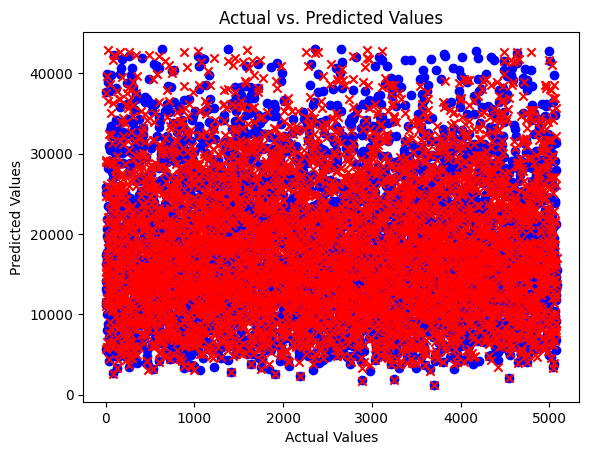

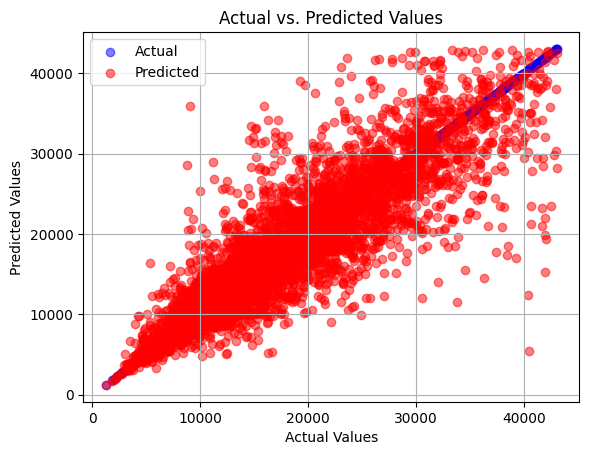

In [49]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [50]:
#Saving the DT model
import pickle
with open('Model\decision_tree_reg_latest.pkl', 'wb') as file:
    pickle.dump(decision_tree_reg, file)

In [51]:
import joblib
joblib.dump(decision_tree_reg, 'Preprocessing modules\decision_tree_reg_latest.joblib')

['decision_tree_reg_latest.joblib']

Mean Absolute Error (MAE): 2757.4131615476404
Mean Squared Error (MSE): 14785531.24592093
Root Mean Squared Error (RMSE): 3845.195865742203
R-squared (R2): 0.7907599898506892


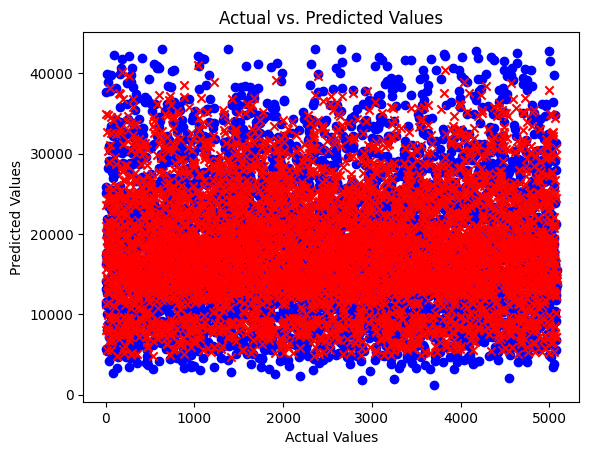

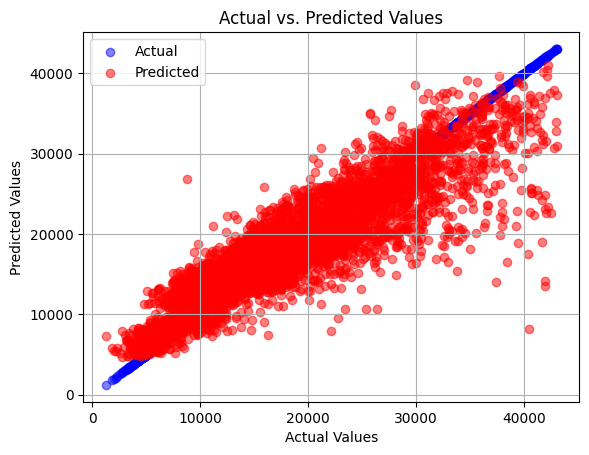

In [52]:
# Create and train the Linear Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 2, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Assuming y_test contains the actual values and y_pred contains the predicted values

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [53]:
#Saving the RF model
import pickle
rf_model = model
with open('Model\rf_latest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [54]:
import joblib
joblib.dump(rf_model, 'Preprocessing modules\rf_latest.joblib')

['rf_latest.joblib']

In [55]:
# Linear Regression Hyperparameter Tuning
linear_reg = LinearRegression()

# Define hyperparameters and their potential values
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Get the best hyperparameters for Linear Regression
best_linear_reg = grid_search_linear.best_estimator_

In [56]:
# Decision Tree Regressor Hyperparameter Tuning
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Decision Tree Regressor
grid_search_decision_tree = GridSearchCV(decision_tree_reg, param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree Regressor
best_decision_tree_reg = grid_search_decision_tree.best_estimator_


c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

In [57]:
# Random Forest Regression Hyperparameter Tuning
random_forest_reg = RandomForestRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_rf = {
    # 'n_estimators': [50, 100, 150],
    # 'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Random Forest Regression
grid_search_rf = GridSearchCV(random_forest_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest Regression
best_rf_reg = grid_search_rf.best_estimator_


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data using the best models
y_pred_lr = best_linear_reg.predict(X_test)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)
y_pred_rf = best_rf_reg.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_lr)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-squared for linear regression
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_linear = 1 - ((1 - r2_linear) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for decision tree regressor
adj_r2_decision_tree = 1 - ((1 - r2_decision_tree) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for random forest regression
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2) Score:", r2_linear)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_linear)

print("\nDecision Tree Regressor:")
print("Mean Squared Error (MSE):", mse_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_decision_tree)
print("Mean Absolute Error (MAE):", mae_decision_tree)
print("R-squared (R2) Score:", r2_decision_tree)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_decision_tree)

print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_rf)


Linear Regression:
Mean Squared Error (MSE): 32328854.518270437
Root Mean Squared Error (RMSE): 5685.846860254894
Mean Absolute Error (MAE): 4407.181164810234
R-squared (R2) Score: 0.5424926074682165
Adjusted R-squared (Adj R2) Score: 0.524237248036316

Decision Tree Regressor:
Mean Squared Error (MSE): 19425235.65366101
Root Mean Squared Error (RMSE): 4407.406908110596
Mean Absolute Error (MAE): 3057.8516766020284
R-squared (R2) Score: 0.7251004081137689
Adjusted R-squared (Adj R2) Score: 0.7141314250121082

Random Forest Regression:
Mean Squared Error (MSE): 9023787.05456408
Root Mean Squared Error (RMSE): 3003.9618929946632
Mean Absolute Error (MAE): 2038.7842534896904
R-squared (R2) Score: 0.8722983122163357
Adjusted R-squared (Adj R2) Score: 0.867202787534974


In [59]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Adj R2'])

# Add values for Linear Regression
metrics_df = metrics_df.append({
    'Model': 'Linear Regression',
    'MSE': round(mse_linear, 2),
    'RMSE': round(rmse_linear, 2),
    'MAE': round(mae_linear, 2),
    'R2': round(r2_linear, 2),
    'Adj R2': round(adj_r2_linear, 2)
}, ignore_index=True)

# Add values for Decision Tree Regressor
metrics_df = metrics_df.append({
    'Model': 'Decision Tree Regressor',
    'MSE': round(mse_decision_tree, 2),
    'RMSE': round(rmse_decision_tree, 2),
    'MAE': round(mae_decision_tree, 2),
    'R2': round(r2_decision_tree, 2),
    'Adj R2': round(adj_r2_decision_tree, 2)
}, ignore_index=True)

# Add values for Random Forest Regression
metrics_df = metrics_df.append({
    'Model': 'Random Forest Regression',
    'MSE': round(mse_rf, 2),
    'RMSE': round(rmse_rf, 2),
    'MAE': round(mae_rf, 2),
    'R2': round(r2_rf, 2),
    'Adj R2': round(adj_r2_rf, 2)
}, ignore_index=True)

# Display the DataFrame
metrics_df


C:\Users\sarth\AppData\Local\Temp\ipykernel_26104\3175442872.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\sarth\AppData\Local\Temp\ipykernel_26104\3175442872.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\sarth\AppData\Local\Temp\ipykernel_26104\3175442872.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


,Model,MSE,RMSE,MAE,R2,Adj R2
0,Linear Regression,32328854.52,5685.85,4407.18,0.54,0.52
1,Decision Tree Regressor,19425235.65,4407.41,3057.85,0.73,0.71
2,Random Forest Regression,9023787.05,3003.96,2038.78,0.87,0.87


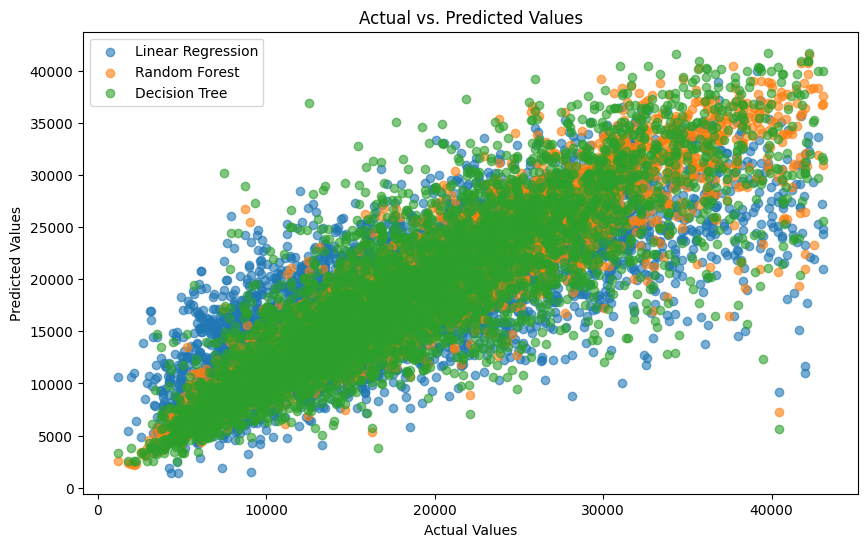

In [60]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


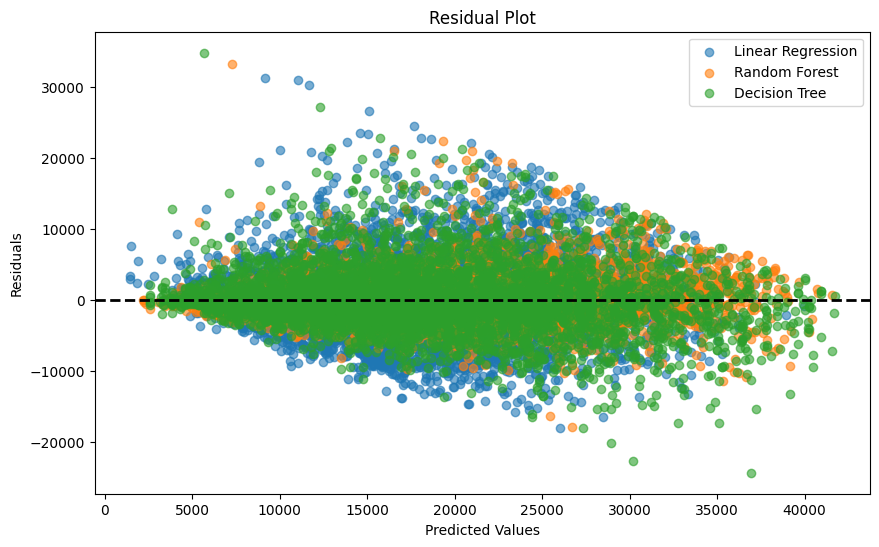

In [61]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor Residuals
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor Residuals
residuals_dt = y_test - y_pred_decision_tree
plt.scatter(y_pred_decision_tree, residuals_dt, label='Decision Tree', alpha=0.6)

plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


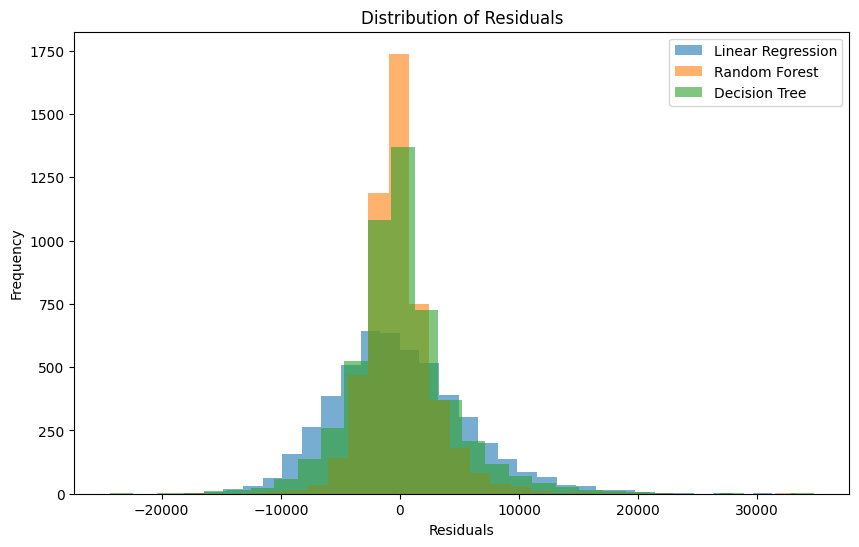

In [62]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals Distribution
plt.hist(residuals_lr, bins=30, alpha=0.6, label='Linear Regression')

# Random Forest Regressor Residuals Distribution
plt.hist(residuals_rf, bins=30, alpha=0.6, label='Random Forest')

# Decision Tree Regressor Residuals Distribution
plt.hist(residuals_dt, bins=30, alpha=0.6, label='Decision Tree')

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()
